# Stacked Bar Chart

Like many visualizations, creating a stacked bar chart in Python is possible using the native matplotlib library as can be seen [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html). However, I find the Seaborn API to be more convenient than the matplotlib API. Seaborn does have a great [barplot function](https://seaborn.pydata.org/generated/seaborn.barplot.html), but there is no option for stacking. Below is a recipe function for generating a stacked barplot from a [wideform](https://github.com/michaelsilverstein/Pandas-and-Plotting/blob/master/lessons/melting_pivotting.ipynb) DataFrame.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate data
We'll create a stacked barplot of how much food each person ate this week.

In [49]:
"""Generate random count data"""
# How much food does each person eat in a week
np.random.seed(123)
data = np.random.poisson(10, (6, 5))
# Let's give our index and columns a name with `.rename_axis()`
df = pd.DataFrame(data, ['apples', 'oranges', 'pears', 'pizzas', 'carrots', 'lollipops'], ['Veronica', 'Carlos', 'Lan', 'Sir Eatsalot', 'Stephanie']).rename_axis(columns='person', index='food')
df

person,Veronica,Carlos,Lan,Sir Eatsalot,Stephanie
food,,,,,
apples,12,7,12,10,8
oranges,9,9,7,10,11
pears,12,12,9,8,5
pizzas,9,9,9,16,11
carrots,8,14,10,6,11
lollipops,8,9,14,12,11


# Stacked bar plot function
Here is a function for creating a stacked barplot. Below is an explanation of how it works.

In [83]:
def stackedbarplot(data, stack_order=None, palette=None, **barplot_kws):
    """
    Create a stacked barplot
    Inputs:
    | data <pd.DataFrame>: A wideform dataframe where the index is the variable to stack, the columns are different samples (x-axis), and the cells the counts (y-axis)
    | stack_order <array-like>: The order for bars to be stacked (Default: given order)
    | palette <array-like>: The colors to use for each value of `stack_order` (Default: husl)
    | barplot_kws: Arguments to pass to sns.barplot()
    """
    # Order df
    if stack_order is None:
        stack_order = data.index
    # Create palette if none
    if palette is None:
        palette = dict(zip(stack_order, sns.husl_palette(len(stack_order))))
    # Compute cumsum
    cumsum = data.loc[stack_order].cumsum()
    # Melt for passing to seaborn
    cumsum_stacked = cumsum.stack().reset_index(name='count')
    # Get name of variable to stack and sample
    stack_name, sample_name = cumsum_stacked.columns[:2]
    
    # Plot bar plot
    for s in stack_order[::-1]:
        # Subset to this stack level
        d = cumsum_stacked[cumsum_stacked[stack_name].eq(s)]
        sns.barplot(x=sample_name, y='count', hue=stack_name, palette=palette, data=d, **barplot_kws)
    return plt.gca()

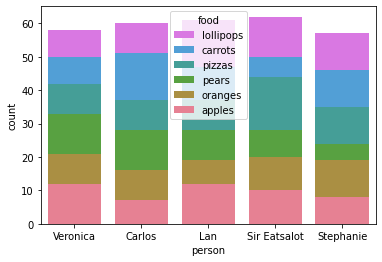

In [84]:
"""Using stackedbarplot"""
stackedbarplot(df)
plt.show()

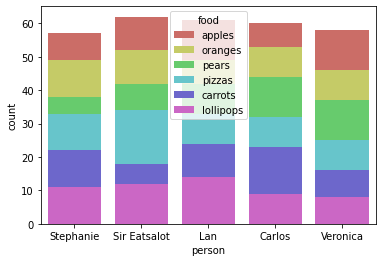

In [91]:
"""Providing arguments"""
# Change the stack order, x-order, provide a palette
pal = dict(zip(df.index, sns.hls_palette(len(df.index))))
stackedbarplot(df, stack_order=df.index[::-1], palette=pal, order=df.columns[::-1])
plt.show()

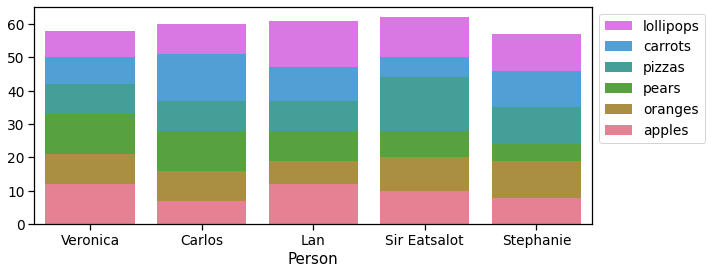

In [86]:
"""Manipulate figure"""
# We can manipulate this figure just like any other matplotlib object
with sns.plotting_context('notebook', font_scale=1.25):
    plt.figure(figsize=(10, 4))
    stackedbarplot(df)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel('Person')
    plt.ylabel('')
plt.show()

# Explanation
The cells below break this function down step-by-step

In [36]:
"""Compute cumulative sum"""
# We want the bars to stack on top of each other, therefore we'll compute the cumulative sum

# Let's choose an order for the stacks (we'll just keep it the same as the `df` but it can be any order)
order = df.index

# Now order and compute the cumulative sum
cumsum = df.loc[order].cumsum()
cumsum

person,Veronica,Carlos,Lan,Sir Eatsalot,Stephanie
food,,,,,
apples,12,7,12,10,8
oranges,21,16,19,20,19
pears,33,28,28,28,24
pizzas,42,37,37,44,35
carrots,50,51,47,50,46
lollipops,58,60,61,62,57


In [38]:
"""Melt df"""
# We'll melt the dataframe in order to pass to seaborn's API
cumsum_stacked = cumsum.stack().reset_index(name='count')
cumsum_stacked.head()

,food,person,count
0,apples,Veronica,12
1,apples,Carlos,7
2,apples,Lan,12
3,apples,Sir Eatsalot,10
4,apples,Stephanie,8


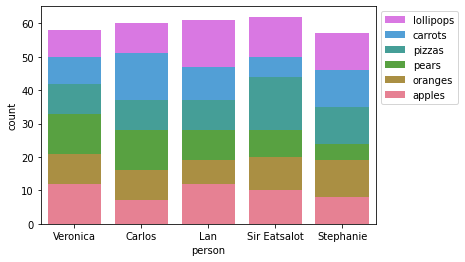

In [43]:
"""Plot"""
# Let's make a palette
palette = dict(zip(order, sns.husl_palette(len(order))))

# Now we can plot a series of barplots, one for food
## We'll plot in reverse order since so that smaller bars are on top 
for food in order[::-1]:
    # Subset to this food
    data = cumsum_stacked[cumsum_stacked.food.eq(food)]
    sns.barplot(x='person', y='count',  hue='food', data=data, palette=palette)
# Let's move that legend to the side
plt.legend(bbox_to_anchor=(1, 1))
plt.show()